In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('data/all/train.csv') # pandas에서 데이터 프레임으로 읽어오기

In [9]:
df.head(10) # 상위 10개 데이터만 가져오기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [11]:
df.groupby(['Sex', 'Pclass']).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [12]:
df.groupby(['Pclass','Sex']).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [13]:
import math

In [15]:
df.Age.dropna() # NaN 값을 제거하는 것

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [17]:
age_series = df.Age.dropna().apply(lambda age: math.floor(age/10)*10)

In [19]:
age_series.name = 'Age_Group'

In [21]:
df = pd.concat( # index(row)를 기준으로 concat함
    [df, age_series],
    axis=1, # axis = 0 으로 하면 rbind, axis=1이면 cbind
)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10.0


In [22]:
df.Age_Group = df.Age_Group.fillna("Uncategorized")

In [24]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Uncategorized
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10


In [25]:
df.groupby("Age_Group").size()

Age_Group
0.0               62
10.0             102
20.0             220
30.0             167
40.0              89
50.0              48
60.0              19
70.0               6
80.0               1
Uncategorized    177
dtype: int64

## df.agg : Aggregate using callable, string, dict, or list of string/callables

In [27]:
df.groupby("Pclass").agg({"Survived":"mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [28]:
df.groupby("Sex").agg({"Survived":"mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [31]:
df.groupby("Sex").agg({"Survived": "sum", "Sex":"count"})

,Survived,Sex
Sex,,
female,233,314
male,109,577


In [32]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins=True, # False 는 All 부분이 없음
)  

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [41]:
?df.pivot_table

In [44]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",
    aggfunc="mean",# defalut : aggfunc="mean" ( 생존률 ); ( 매출: SUM )
)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [46]:
df.groupby(["Pclass", "Sex"]).size().unstack(1)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [47]:
temp_df = df.groupby(["Pclass", "Sex"]).size().unstack(0)
temp_df

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [59]:
df.groupby(["Pclass", "Sex"]).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [48]:
# temp_df.sum(axis=1)
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
# 비율을 연산하는 과정                .sum() => .div()
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [50]:
plt.rcParams['figure.figsize'] = (12,6)

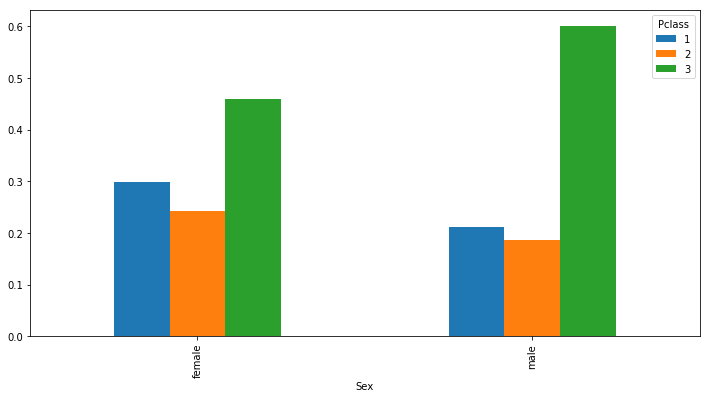

In [51]:
bar_plot = result_df.plot.bar();

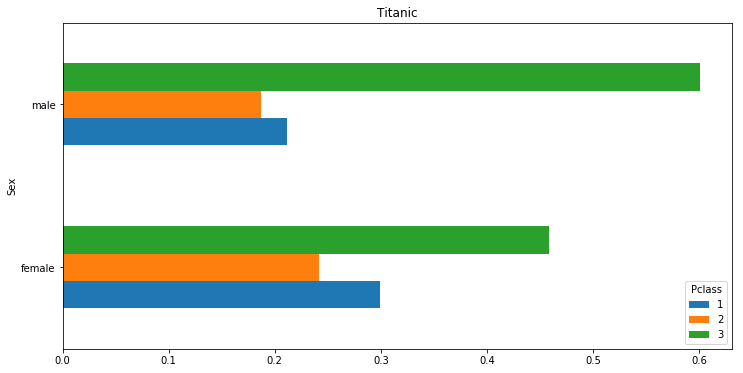

In [52]:
result_df.plot(kind="barh", title="Titanic");

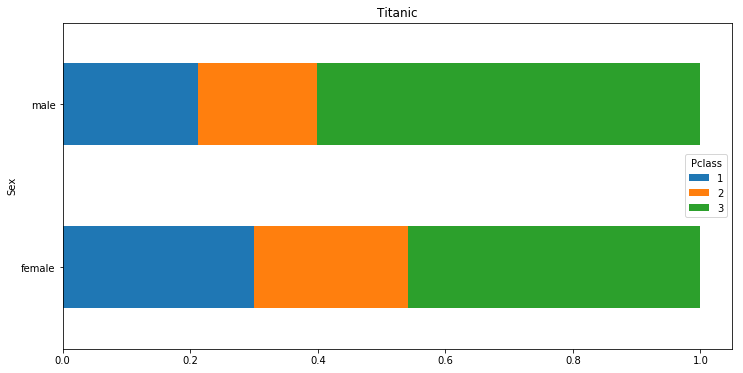

In [53]:
result_df.plot(kind="barh", title="Titanic", stacked=True);

## seaborn 은 그래픽을 좀 더 부드럽게 해줌

In [58]:
import seaborn as sns
sns.set()

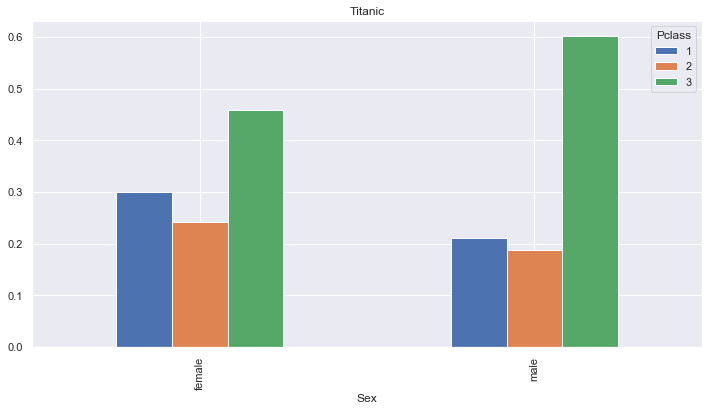

In [55]:
result_df.plot.bar(title="Titanic");

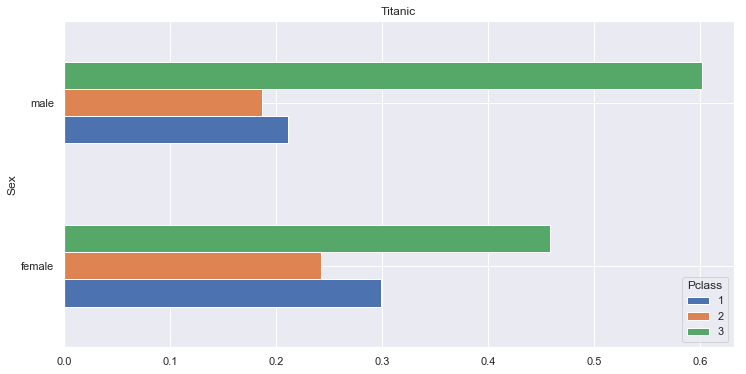

In [56]:
result_df.plot(kind="barh", title="Titanic");

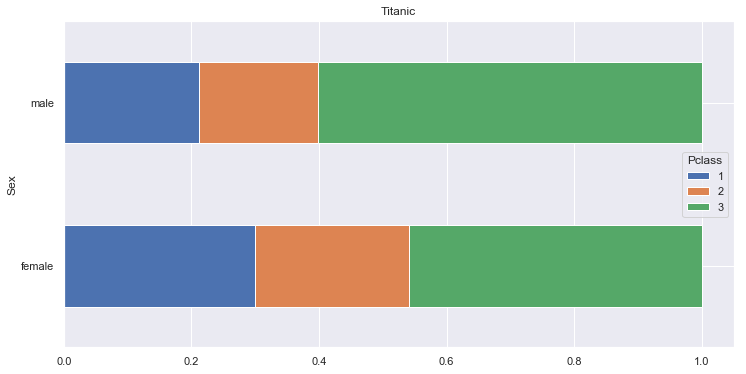

In [57]:
result_df.plot(kind="barh", title="Titanic", stacked=True);